# Bad Electrodes vs Good Electrodes 2: Extensive Analysis

More patients, more graphs, more analysis.
***
## First, get data

In [5]:
import h5py
import os
os.chdir("C:/Users/Nitin/Documents/Hopkins/BCI/datashare/nicolas")

# return tuple of patient info
def get_patient(filename, nitin_auto_bad, nitin_man_bad):
    elec_range = range(0, 110)
    # get data
    D = h5py.File(filename + ".mat", 'r')
    patient = D["EEG"]["data"][:, :]
    time = D["EEG"]["times"][:]
    nic_auto_bad = D["auto_badchans"][:]
    nic_man_bad = D["man_badchans"][:]
    # get zero elecs
    zero_elec = []
    for i in range(patient.shape[1]):
        is_zero = True
        for j in range(500):
            if patient[j, i] != 0:
                is_zero = False
        if is_zero:
            zero_elec.append(i)
    
    # make it 0-indexed
    nic_auto_bad = [int(x) - 1 for x in nic_auto_bad if x != 0]
    nic_man_bad = [int(x) - 1 for x in nic_man_bad if x != 0]
    nitin_auto_bad = [int(x) - 1 for x in nitin_auto_bad]
    nitin_man_bad = [int(x) - 1 for x in nitin_man_bad]
    # get good electrodes
    good_elec = set(elec_range) - set(nic_auto_bad) - set(nic_man_bad) - set(nitin_auto_bad) - set(nitin_man_bad) - set(zero_elec)
    return patient, time, nic_auto_bad, nic_man_bad, nitin_auto_bad, nitin_man_bad, zero_elec, good_elec, filename


Using, this function, let's get one data set we know and establsih an object so we know what we're working with in the plotting section.

In [6]:
test_patient_name = "gp_A00051826001"
# manually checked bad electrodes
test_nitin_man_bad = [26, 52, 58, 72, 78, 79, 95, 100, 105, 111]
# thresholds of 2 for kurtosis and prob detection
test_nitin_auto_bad = [24, 25, 26, 36, 46, 66, 72, 89, 105]
test_patient = get_patient(test_patient_name, test_nitin_auto_bad, test_nitin_man_bad)
for i in range(len(test_patient)):
    print "Field", i
    print test_patient[i]
    print
    
elec_range = range(111)

Field 0
[[  0.          29.62586975 -30.25629234 ...,  -4.11390781 -37.13315582
  -22.65051651]
 [  0.          31.88331604 -28.49687767 ...,  -1.09500039 -35.70406723
  -22.78487778]
 [  0.          41.04415894 -24.38269424 ...,   6.6689558  -32.02872467
  -24.52308655]
 ..., 
 [  0.         -10.06331635  -6.89713621 ...,  -9.24706459  -5.35749674
    0.76466715]
 [  0.          -8.27858448  -4.11237717 ...,  -5.81554461  -2.33136368
    1.7913388 ]
 [  0.          -1.24300706  -0.86053288 ...,  -0.11432392  -0.29505765
    1.14410412]]

Field 1
[[ -0.00000000e+00]
 [  2.00000000e+00]
 [  4.00000000e+00]
 ..., 
 [  4.18046000e+05]
 [  4.18048000e+05]
 [  4.18050000e+05]]

Field 2
[47, 53, 55, 56, 63, 71, 82, 96, 104, 110]

Field 3
[]

Field 4
[23, 24, 25, 35, 45, 65, 71, 88, 104]

Field 5
[25, 51, 57, 71, 77, 78, 94, 99, 104, 110]

Field 6
[0, 7, 13, 19, 23, 30]

Field 7
set([1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38

In [9]:
def patient_fields():
    print "0 patient"
    print "1 time"
    print "2 nic_auto_bad"
    print "3 nic_man_bad"
    print "4 nitin_auto_bad"
    print "5 nitin_man_bad"
    print "6 zero_elec"
    print "7 good_elec"
    print "8 filename"

In [11]:
patient_names = ["gp_A00051826001"]# , "bip_A00053375001.mat", "gip_A00051955001.mat", "gip_A00053440001.mat", "gp_A00051886001.mat"]

patients = []
# these were 
manual_A00051826_nitin_bad = [26, 52, 58, 72, 78, 79, 95, 100, 105, 111]
# thresholds of 2 for kurtosis and prob detection
A00051826_nitin_bad = [24, 25, 26, 36, 46, 66, 72, 89, 105]
patients_nitin_bad = [A00051826_nitin_bad]#, [], [], [], [], []]
for i in range(len(patient_names)):
    patients.append(get_patient(patient_names[i], manual_A00051826_nitin_bad, A00051826_nitin_bad))

***
## First, test matplotlib

In [12]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 6.0)

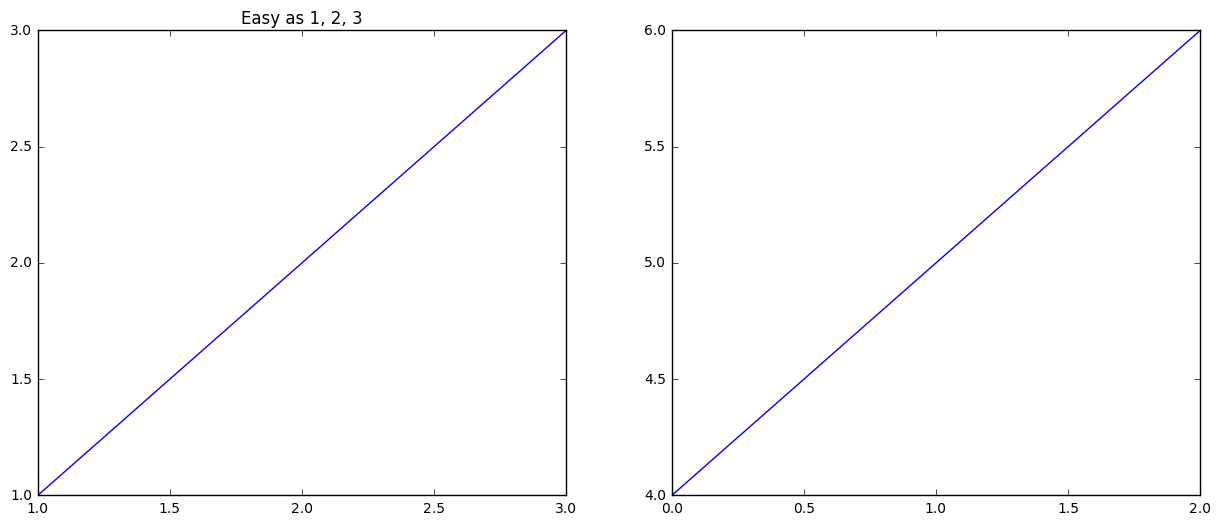

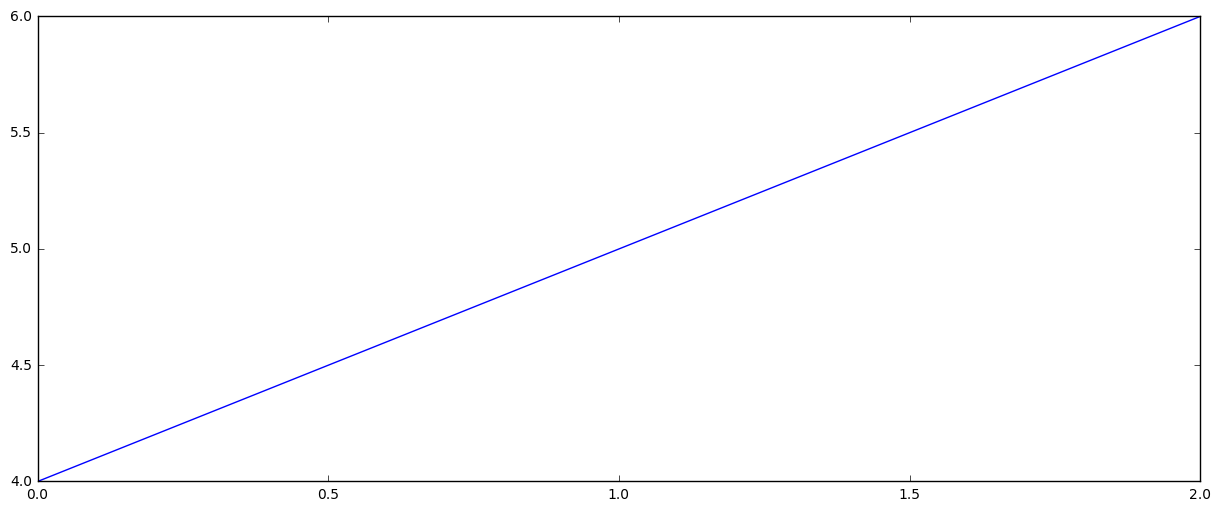

In [13]:
plt.figure(1)                # the first figure
plt.subplot(121)             # the first subplot in the first figure
plt.plot([1,2,3],[1, 2, 3])
plt.subplot(122)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(121)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

## Now, plot some of the test patient.

0 patient
1 time
2 nic_auto_bad
3 nic_man_bad
4 nitin_auto_bad
5 nitin_man_bad
6 zero_elec
7 good_elec
8 filename


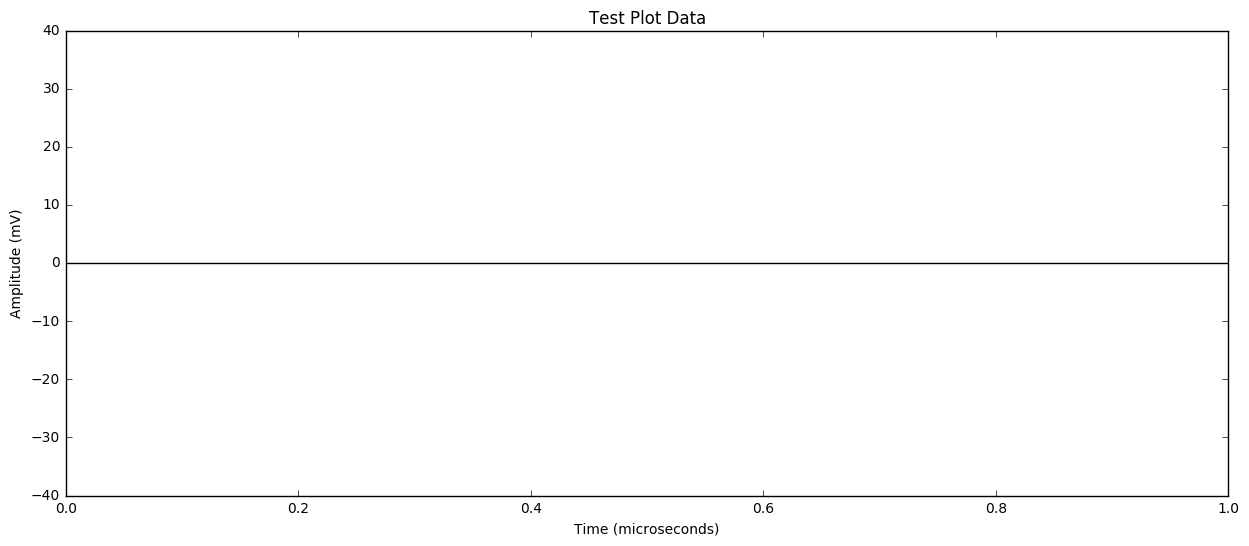

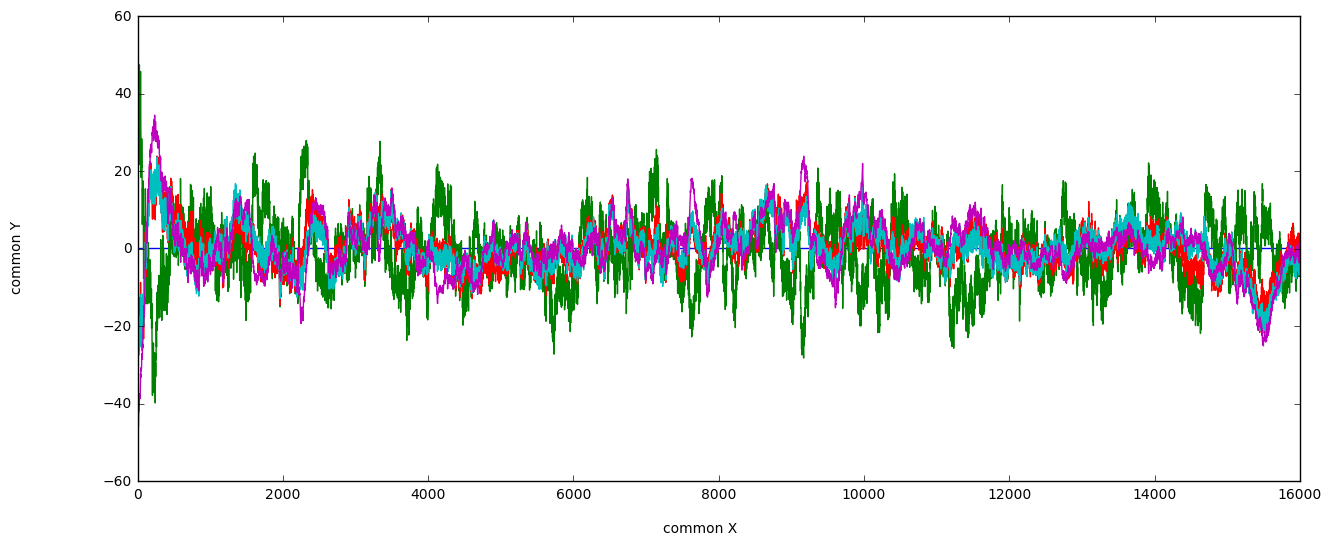

In [14]:
patient_fields()
plt.figure(1)                # the first figure
plt.ylim([-40,40])
time = 8000 # amount of timesteps being looked at
plt.title('Test Plot Data')
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time (microseconds)')
plt.axhline(0, color='black')
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')


plt.subplot(111)
plt.plot(test_patient[1][:time], test_patient[0][:time,0:5])
# plt.subplot(211)
# plt.plot(test_patient[1][:time], test_patient[0][:time,5:10])

In [15]:
import random

In [16]:
# which plots need to be done
def plot_names():
    print "Manually Good and Good by Nitin/Nicolas"
    print "Manually Bad and Good by Nitin/Nicolas"
    print "Manually Good and Bad by Nicolas Automatic"
    print "Manually Bad and Bad by Nicolas Automatic"
    print "Manually Good and Bad by Nicolas Manual"
    print "Manually Bad and Bad by Nicolas Manual"
    print "Manually Good and Bad by Nitin Automatic"
    print "Manually Bad and Bad by Nitin Automatic"
    print "Automatically Good and Bad by Nicolas Automatic"
    print "Automatically Bad and Bad by Nicolas Automatic"

Manually Good and Good by Nitin/Nicolas
Manually Bad and Good by Nitin/Nicolas
Manually Good and Bad by Nicolas Automatic
Manually Bad and Bad by Nicolas Automatic
Manually Good and Bad by Nicolas Manual
Manually Bad and Bad by Nicolas Manual
Manually Good and Bad by Nitin Automatic
Manually Bad and Bad by Nitin Automatic
Automatically Good and Bad by Nicolas Automatic
Automatically Bad and Bad by Nicolas Automatic
0 patient
1 time
2 nic_auto_bad
3 nic_man_bad
4 nitin_auto_bad
5 nitin_man_bad
6 zero_elec
7 good_elec
8 filename
[37, 16, 40, 105, 67]
[99, 78, 57, 94, 77]
[82, 96, 47, 53, 63]
[71, 104, 110]
[]
[71, 25, 104]
[35, 88, 24, 45, 65, 23]
[104, 25, 71]
[55, 82, 47, 110, 56, 53, 96, 63]
[71, 104]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

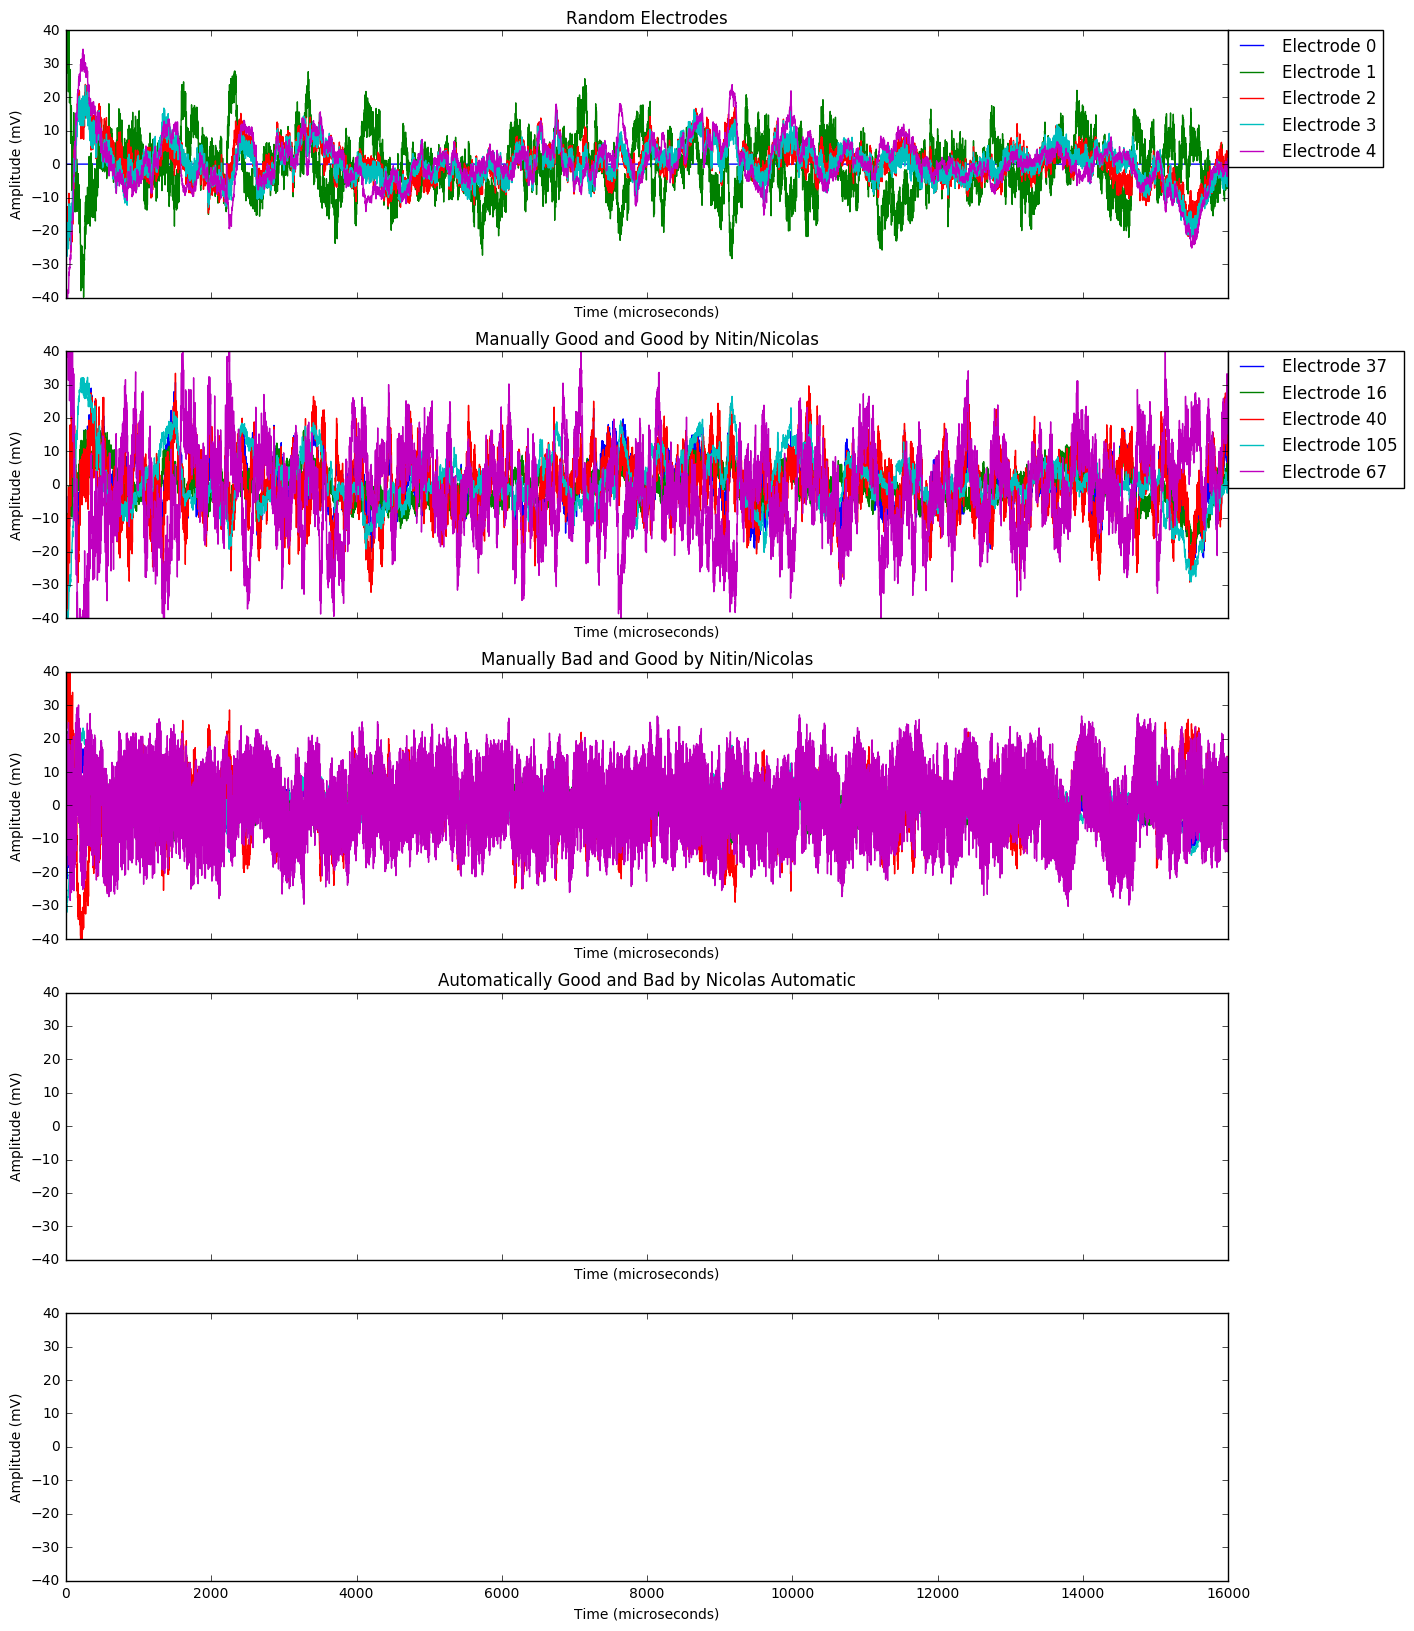

In [17]:
plot_names()
patient_fields()
fig, axs = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True, figsize=(15,20))
for ax in axs:
    ax.set_ylabel('Amplitude (mV)')
    ax.set_xlabel('Time (microseconds)')
    ax.set_ylim([-40,40])

n = 8000 # number of timesteps
# Manually Good and Good by Nitin/Nicolas
ind0 = random.sample(test_patient[7], 5)
data0 = test_patient[0][:n,ind0]
# Manually Bad and Good by Nitin/Nicolas
set1 = set(elec_range) - set(test_patient[2]) - set(test_patient[3]) - set(test_patient[4]) # remove all good by nitin auto and nicolas all
set1 = set1 & set(test_patient[5])
ind1 = random.sample(set1, 5)
data1 = test_patient[0][:n, ind1]
# Manually Good and Bad by Nicolas Automatic
set2 = set(elec_range) - set(test_patient[5]) # remove all nitin manually bad
set2 = set2 & set(test_patient[2]) # keep all nicolas auto bad
ind2 = random.sample(set2, 5)
data2 = test_patient[0][:n, ind2]
# Manually Bad and Bad by Nicolas Automatic
set3 = set(elec_range) & set(test_patient[2]) & set(test_patient[5]) # keep all nicolas auto bad and nitin man bad
ind3 = random.sample(set3, len(set3))
data3 = test_patient[0][:n, ind3]
# Manually Good and Bad by Nicolas Manually
set4 = set(elec_range) - set(test_patient[5]) # remove all nitin manually bad
set4 = set4 & set(test_patient[3]) # keep all nicolas manual bad
ind4 = random.sample(set4, len(set4))
data4 = test_patient[0][:n, ind4]
# Manually Bad and Bad by Nicolas Manually
set5 = set(elec_range) & set(test_patient[4]) & set(test_patient[5]) # keep all nicolas manual bad and nitin man bad
ind5 = random.sample(set5, len(set5))
data5 = test_patient[0][:n, ind5]
# Manually Good and Bad by Nitin Automatic
set6 = set(elec_range) - set(test_patient[5]) # remove all nitin manually bad
set6 = set6 & set(test_patient[4]) # keep all nitin auto bad
ind6 = random.sample(set6, len(set6))
data6 = test_patient[0][:n, ind6]
# Manually Bad and Bad by Nitin Automatic
set7 = set(elec_range) & set(test_patient[4]) & set(test_patient[5]) # keep all nitin auto bad and nitin man bad
ind7 = random.sample(set7, len(set7))
data7 = test_patient[0][:n, ind7]
# Automatically Good and Bad by Nicolas Automatic
set8 = set(elec_range) - set(test_patient[4]) # remove all nitin automatically bad
set8 = set8 & set(test_patient[2]) # keep all nicolas auto bad
ind8 = random.sample(set8, len(set8))
data8 = test_patient[0][:n, ind8]
# Automatically Bad and Bad by Nicolas Automatic
set9 = set(elec_range) & set(test_patient[2]) & set(test_patient[4]) # keep all nitin auto bad and nicolas auto bad
ind9 = random.sample(set9, len(set9))
data9 = test_patient[0][:n, ind9]

print ind0
print ind1
print ind2
print ind3
print ind4
print ind5
print ind6
print ind7
print ind8
print ind9
    
#### Test plotting code
axs[0].set_title('Random Electrodes')
axs[0].plot(test_patient[1][:n], test_patient[0][:n, 0:5])
leg = []
for i in range(5):
    leg.append('Electrode ' + str(i))
axs[0].legend(leg, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
# plt.plot(test_patient[1][:time], test_patient[0][:time,5:10])

axs[1].set_title('Manually Good and Good by Nitin/Nicolas')
axs[1].plot(test_patient[1][:n], data0)
leg = []
for i in ind0:
    leg.append('Electrode ' + str(i))
axs[1].legend(leg, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


axs[2].set_title('Manually Bad and Good by Nitin/Nicolas')
axs[2].plot(test_patient[1][:n], data1)
    
axs[3].set_title('Automatically Good and Bad by Nicolas Automatic')
if data8:
    axs[3].plot(test_patient[1][:n], data8)

axs[4].set_title('Automatically Bad and Bad by Nicolas Automatic')
if data9:
    axs[4].plot(test_patient[1][:n], data9)

plt.tight_layout()
# fig.text(0.5, 0.04, 'common X', ha='center')
# fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

## With this background, before making a plotting function, first make the code more intelligent and readable.

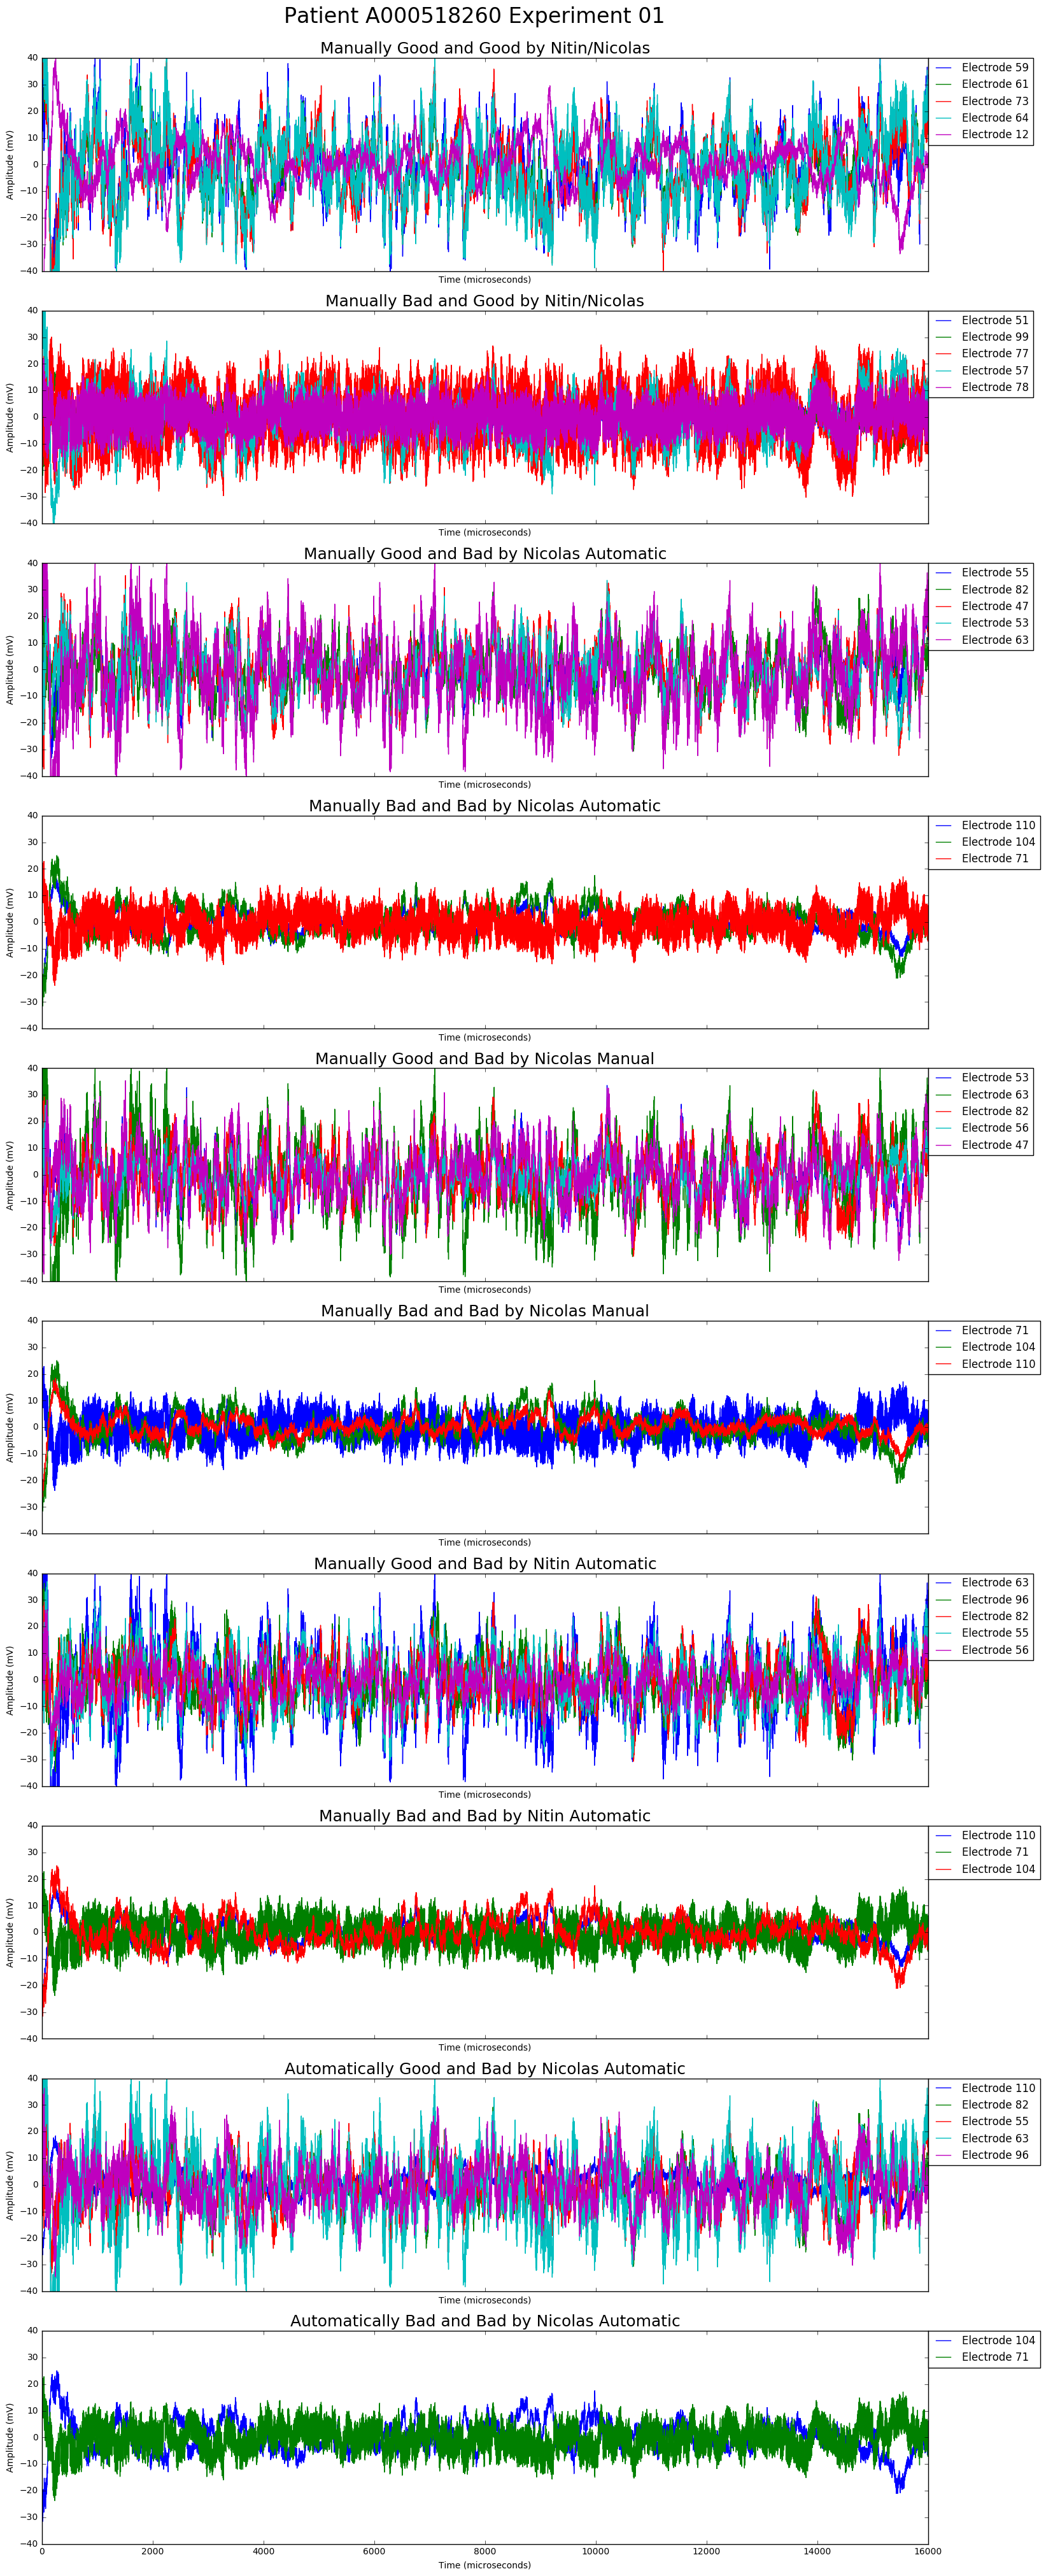

In [20]:
# First, set plot titles
plot_titles = [
    "Manually Good and Good by Nitin/Nicolas",
    "Manually Bad and Good by Nitin/Nicolas",
    "Manually Good and Bad by Nicolas Automatic",
    "Manually Bad and Bad by Nicolas Automatic",
    "Manually Good and Bad by Nicolas Manual",
    "Manually Bad and Bad by Nicolas Manual",
    "Manually Good and Bad by Nitin Automatic",
    "Manually Bad and Bad by Nitin Automatic",
    "Automatically Good and Bad by Nicolas Automatic",
    "Automatically Bad and Bad by Nicolas Automatic"
]

# next, set electrode sets to remove
to_remove = [
    [2, 3, 4, 5], #     "Manually Good and Good by Nitin/Nicolas",
    [2, 3, 4], #     "Manually Bad and Good by Nitin/Nicolas",
    [5], #     "Manually Good and Bad by Nicolas Automatic",
    [], #     "Manually Bad and Bad by Nicolas Automatic",
    [5], #     "Manually Good and Bad by Nicolas Manual",
    [], #     "Manually Bad and Bad by Nicolas Manual",
    [5], #     "Manually Good and Bad by Nitin Automatic",
    [], #     "Manually Bad and Bad by Nitin Automatic",
    [4], #     "Automatically Good and Bad by Nicolas Automatic",
    [] #     "Automatically Bad and Bad by Nicolas Automatic"
]

# then the ones to intersect
to_intersect = [
    [], #     "Manually Good and Good by Nitin/Nicolas",
    [5], #     "Manually Bad and Good by Nitin/Nicolas",
    [2], #     "Manually Good and Bad by Nicolas Automatic",
    [2,5], #     "Manually Bad and Bad by Nicolas Automatic",
    [2], #     "Manually Good and Bad by Nicolas Manual",
    [2,5], #     "Manually Bad and Bad by Nicolas Manual",
    [2], #     "Manually Good and Bad by Nitin Automatic",
    [2,5], #     "Manually Bad and Bad by Nitin Automatic",
    [2], #     "Automatically Good and Bad by Nicolas Automatic",
    [2, 4] #     "Automatically Bad and Bad by Nicolas Automatic"
]

# Format plots
fig, axs = plt.subplots(nrows=len(to_intersect), ncols=1, sharex=True, sharey=True, figsize=(15,4 * len(to_intersect)))
# Give figure overall title of patient name
fig.suptitle('Patient A000518260 Experiment 01', fontsize=24, y=1.01)
for ax in axs:
    ax.set_ylabel('Amplitude (mV)')
    ax.set_xlabel('Time (microseconds)')
    ax.set_ylim([-40,40])

# Set timesteps
n = 8000

# Generate and plot data
for i in range(len(to_intersect)):
    elecs = set(elec_range)
    # remove and intersect electrodes to be removed/intersected
    for j in to_remove[i]:
        elecs = elecs - set(test_patient[j])
    for j in to_intersect[i]:
        elecs = elecs & set(test_patient[j])
    # Get a sample of 5 electrodes from the potential electrodes
    if len(elecs) >= 5:
        ind = random.sample(elecs, 5)
    else:
        ind = random.sample(elecs, len(elecs))
    axs[i].set_title(plot_titles[i], fontsize=18)
    if len(ind) > 0:
        leg = []
        for j in ind:
            leg.append('Electrode ' + str(j))
        axs[i].plot(test_patient[1][:n], test_patient[0][:n, ind])
        axs[i].legend(leg, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

In [21]:
def time_plotter(patient, plot_titles, to_remove, to_intersect):
    # Format plots
    fig, axs = plt.subplots(nrows=len(to_intersect), ncols=1, sharex=True, sharey=True, figsize=(15,4 * len(to_intersect)))
    # Give figure overall title of patient name
    fig.suptitle(patient[8], fontsize=24, y=1.01)
    for ax in axs:
        ax.set_ylabel('Amplitude (mV)')
        ax.set_xlabel('Time (microseconds)')
        ax.set_ylim([-40,40])

    # Set timesteps
    n = 8000

    # Generate and plot data
    for i in range(len(to_intersect)):
        elecs = set(elec_range)
        # remove and intersect electrodes to be removed/intersected
        for j in to_remove[i]:
            elecs = elecs - set(test_patient[j])
        for j in to_intersect[i]:
            elecs = elecs & set(test_patient[j])
        # Get a sample of 5 electrodes from the potential electrodes
        # or if less than 5 electrodes in final set, get however many there are
        if len(elecs) >= 5:
            ind = random.sample(elecs, 5)
        else:
            ind = random.sample(elecs, len(elecs))
        # Set plot title
        axs[i].set_title(plot_titles[i], fontsize=18)
        # Check if there is anything being plotted
        if len(ind) > 0:
            leg = []
            for j in ind:
                leg.append('Electrode ' + str(j))
            axs[i].plot(test_patient[1][:n], test_patient[0][:n, ind])
            axs[i].legend(leg, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()

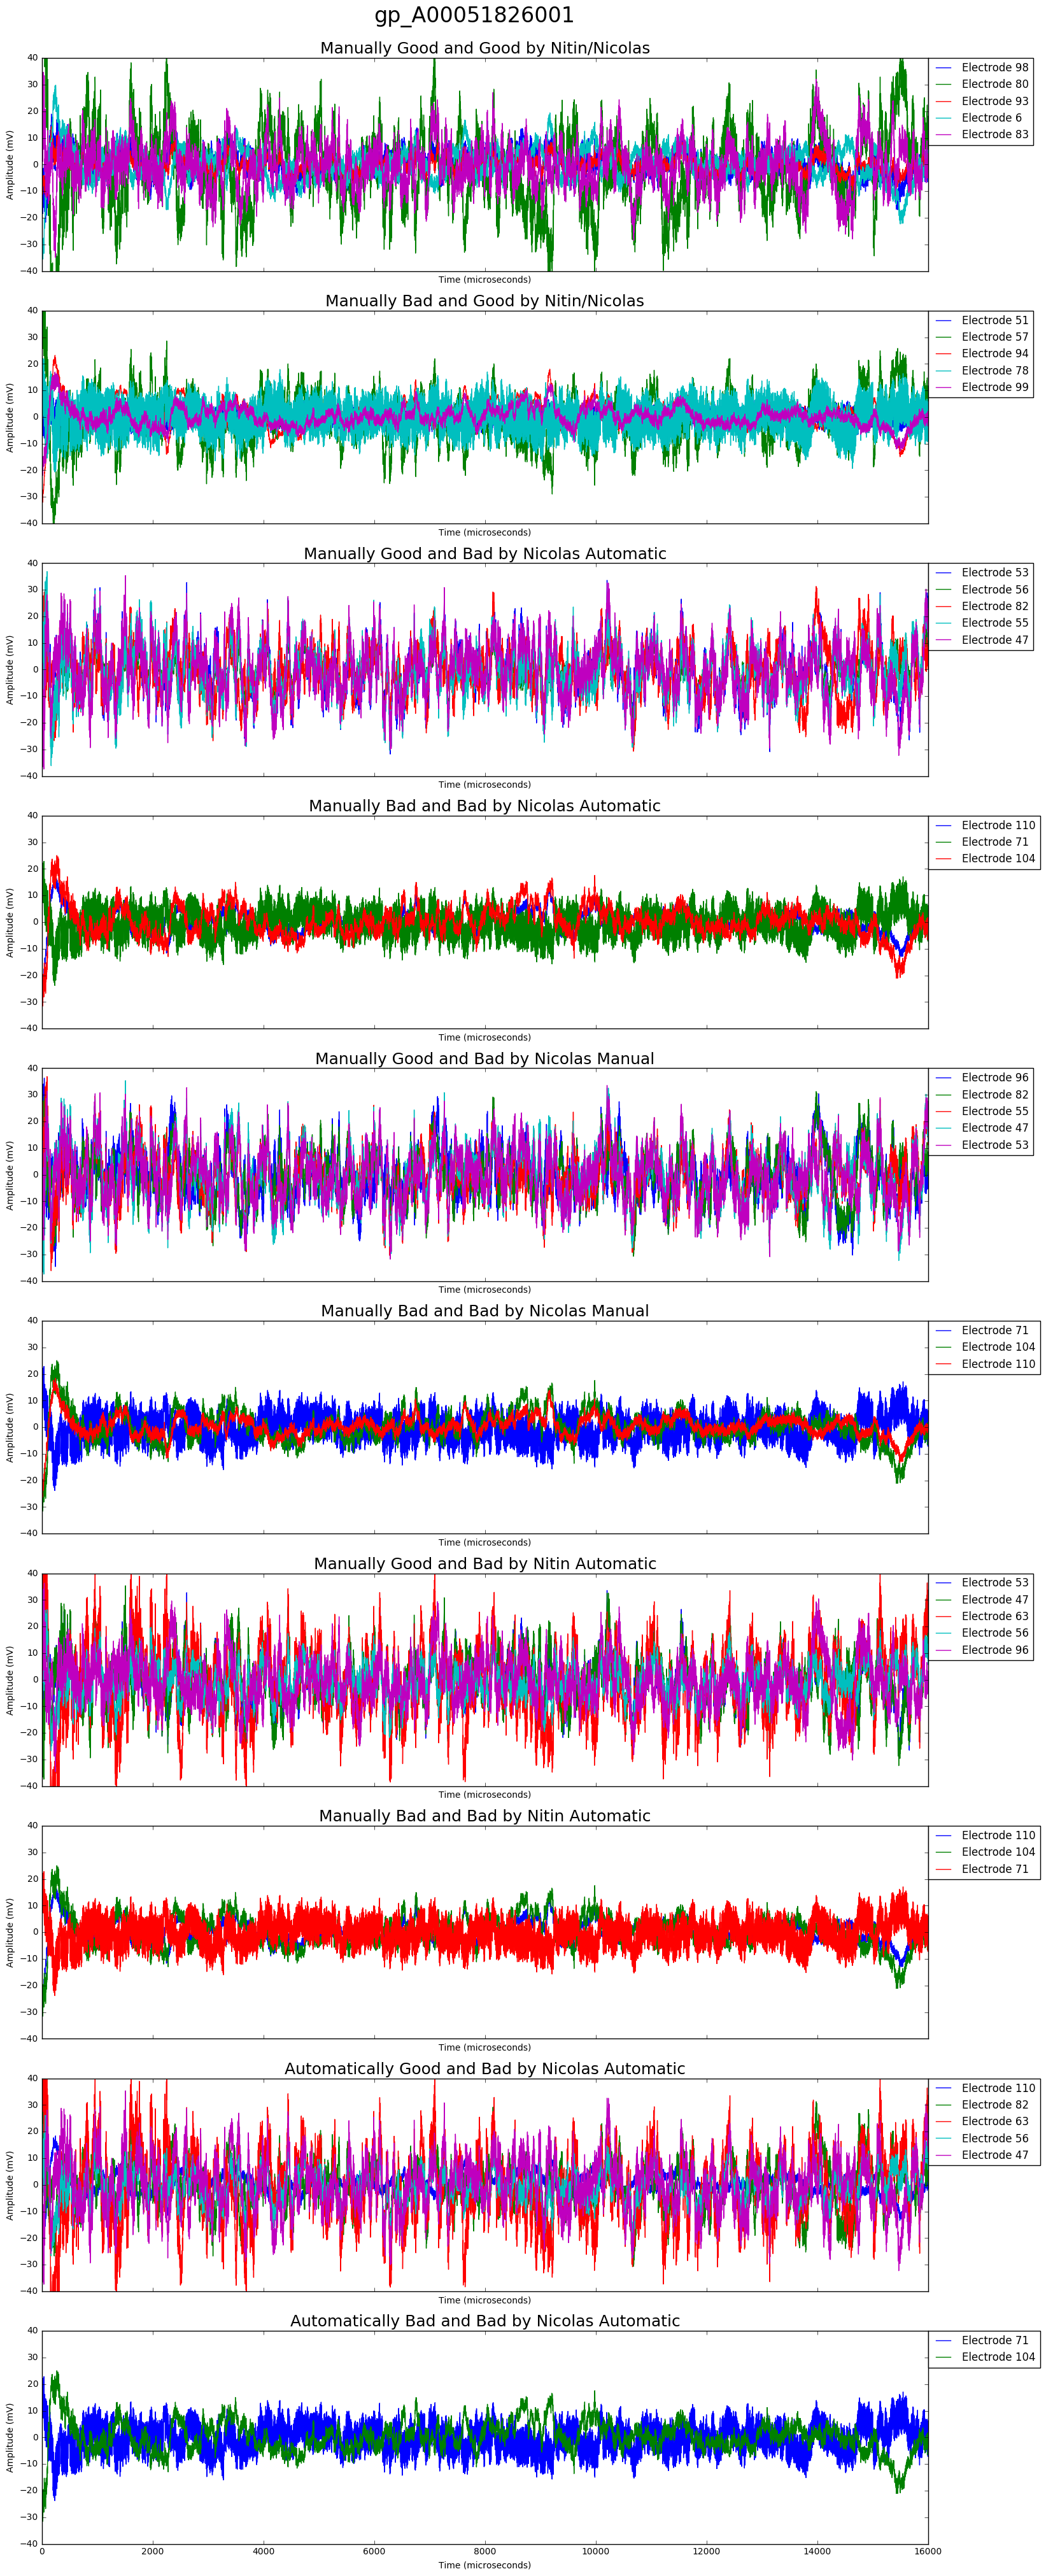

In [22]:
time_plotter(test_patient, plot_titles, to_remove, to_intersect)

### Now need a frequency plotter!

In [23]:
import numpy as np
from scipy.signal import spectrogram

In [24]:
def freq_plotter(patient, plot_titles, to_remove, to_intersect):
    # Format plots
    fig, axs = plt.subplots(nrows=len(to_intersect), ncols=1, sharex=True, sharey=True, figsize=(15,4 * len(to_intersect)))
    # Give figure overall title of patient name
    fig.suptitle(patient[8], fontsize=24, y=1.01)
    for ax in axs:
        ax.set_ylabel('Amplitude (mV)')
        ax.set_xlabel('Time (microseconds)')
        ax.set_ylim([0,1000])
        ax.set_xlim([0,3000])

    # Set timesteps
    n = 8000

    # Generate and plot data
    for i in range(len(to_intersect)):
        elecs = set(elec_range)
        # remove and intersect electrodes to be removed/intersected
        for j in to_remove[i]:
            elecs = elecs - set(test_patient[j])
        for j in to_intersect[i]:
            elecs = elecs & set(test_patient[j])
        # Get a sample of 5 electrodes from the potential electrodes
        # or if less than 5 electrodes in final set, get however many there are
        if len(elecs) >= 5:
            ind = random.sample(elecs, 5)
        else:
            ind = random.sample(elecs, len(elecs))
        axs[i].set_title(plot_titles[i], fontsize=18)
        if len(ind) > 0:
            leg = []
            for j in ind:
                leg.append('Electrode ' + str(j))
            # freq spectrum conversion
            freqs = np.fft.fftshift(np.fft.fftfreq(int(patient[1][n]), .002))
            freqs = freqs[len(freqs)/2:]
            freqs = [x - 125 for x in freqs]
            ps = (np.abs(np.fft.fft(patient[0][:n, j])/500) ** 2)
            axs[i].plot(test_patient[1][:n], ps)
            axs[i].legend(leg, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()

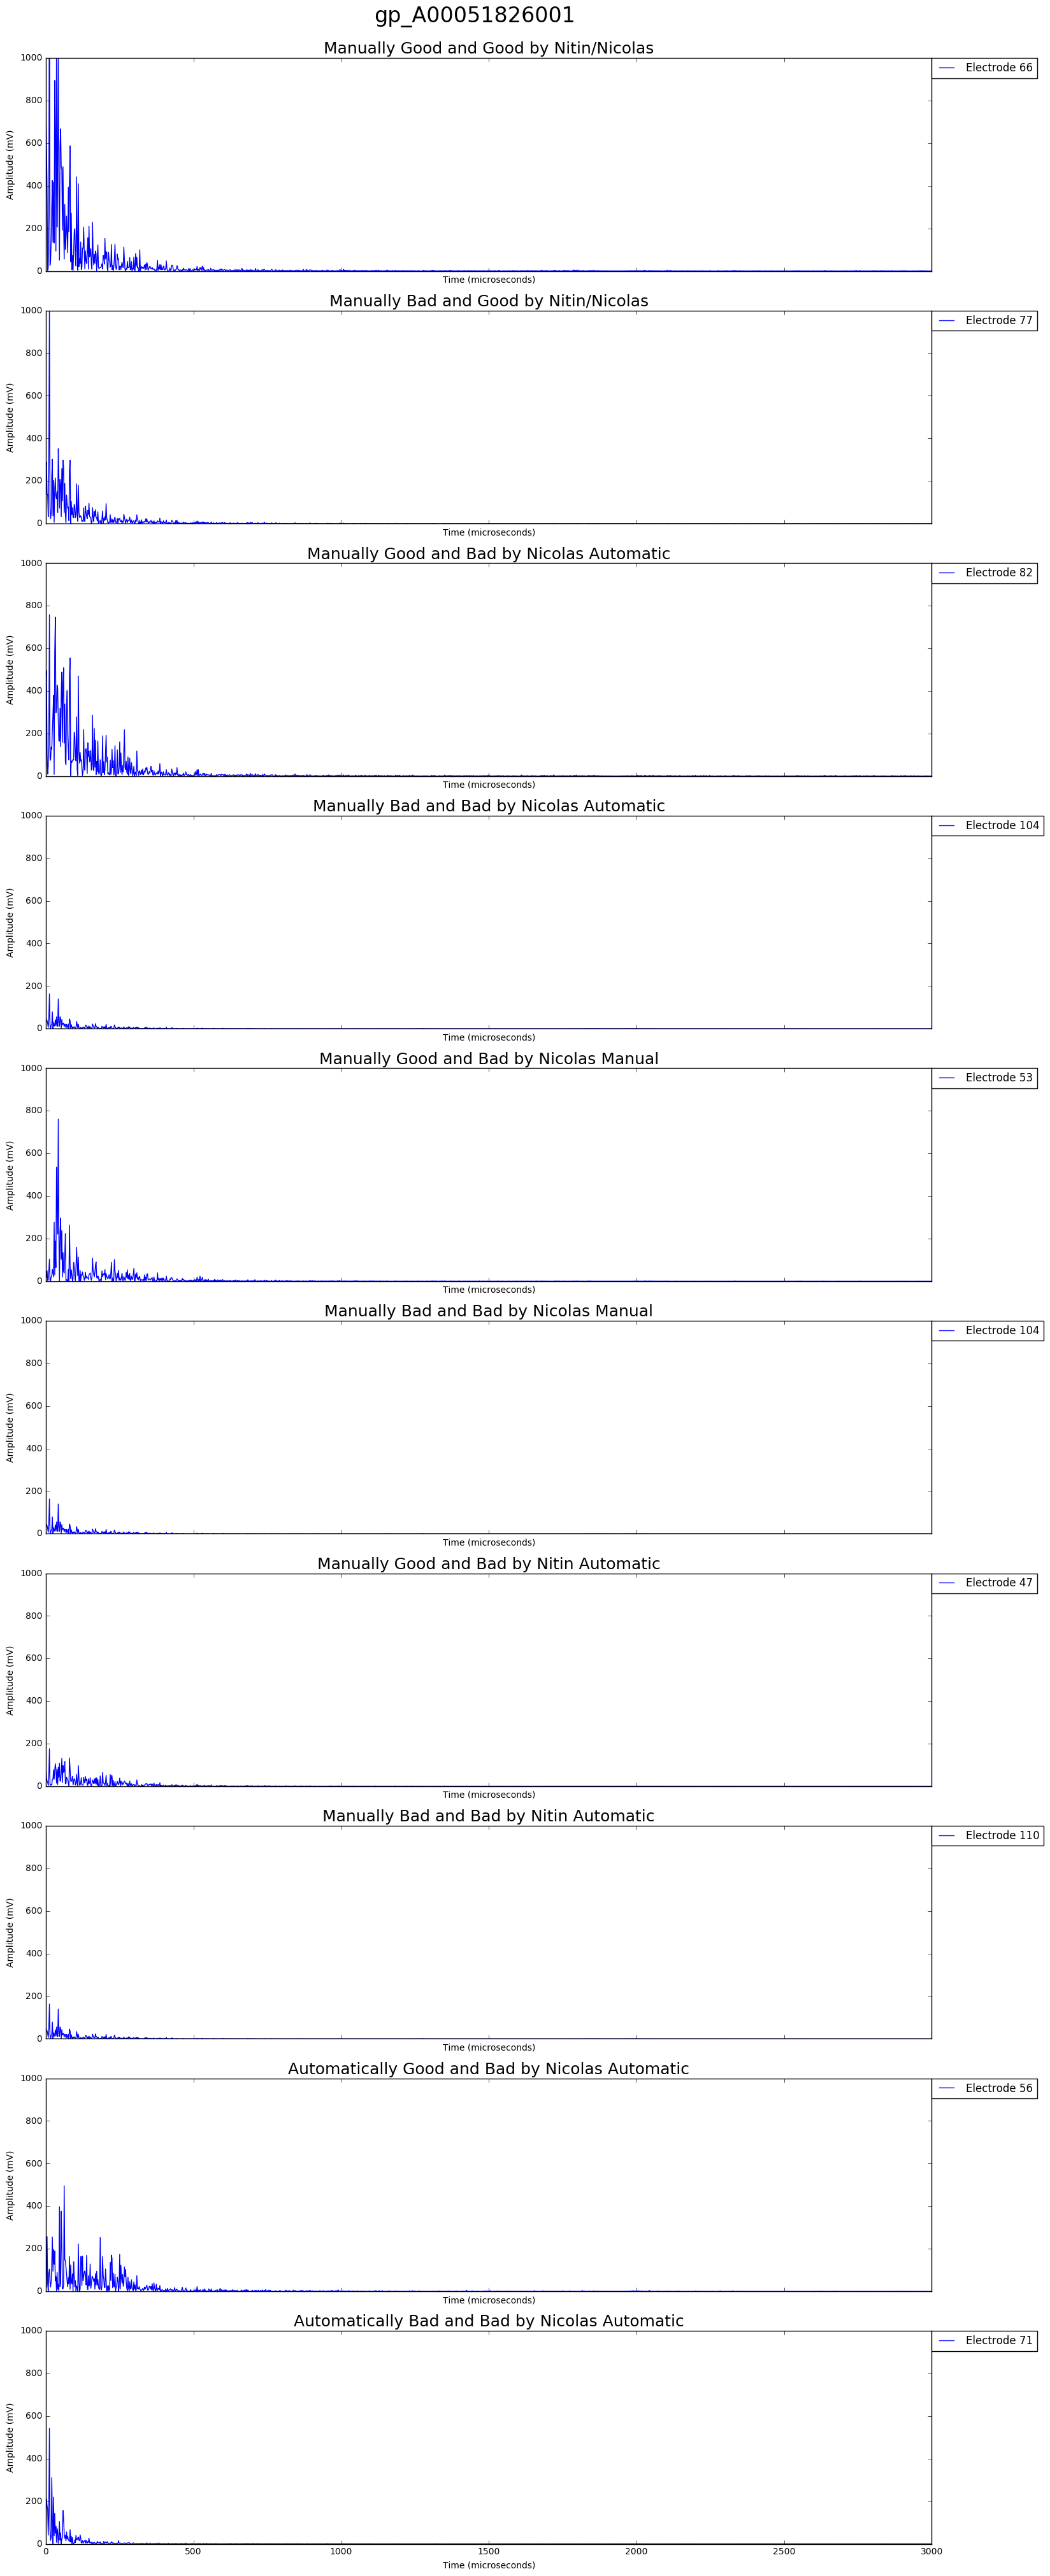

In [25]:
freq_plotter(test_patient, plot_titles, to_remove, to_intersect)

***
# Now, for each patient, will make a set of plots

In [26]:
patient_names = [
    "gp_A00051826001",
    "bip_A00053375001",
    "gip_A00051826005",
    "gip_A00051955001",
    "gip_A00053440001",
    "gp_A00051826001",
    "gp_A00051886001",
    "oip_A00053398_part2001",
    "gip_A00054417001",
    "bip_A00054215001",
    "gip_A00054207001",
    "gp_A00054039001",
    "gp_A00054023001",
    "gp_A00053990001",
    "oip_A00053909001",
    "gp_A00053597001",
    "oip_A00053480001",
    "gip_A00053460001"]

patients = []

# thresholds of 2 for kurtosis and prob detection

auto_nitin_bad = [
    [24, 25, 26, 36, 46, 66, 72, 89, 105], #     "gp_A00051826001",
    [11, 37, 73], #     "bip_A00053375001",
    [], #     "gip_A00051826005",
    [], #     "gip_A00051955001",
    [], #     "gip_A00053440001",
    [], #     "gp_A00051826001",
    [], #     "gp_A00051886001",
    [], #     "oip_A00053398_part2001",
    [], #     "gip_A00054417001",
    [4, 13, 19, 50, 61, 62, 66, 73], #     "bip_A00054215001",
    [], #     "gip_A00054207001",
    [], #     "gp_A00054039001",
    [], #     "gp_A00054023001",
    [], #     "gp_A00053990001",
    [], #     "oip_A00053909001",
    [], #     "gp_A00053597001",
    [], #     "oip_A00053480001",
    [] #     "gip_A00053460001"]
]

manual_nitin_bad = [
    [26, 52, 58, 72, 78, 79, 95, 100, 105, 111], #     "gp_A00051826001",
    [], #     "bip_A00053375001",
    [], #     "gip_A00051826005",
    [], #     "gip_A00051955001",
    [], #     "gip_A00053440001",
    [], #     "gp_A00051826001",
    [], #     "gp_A00051886001",
    [], #     "oip_A00053398_part2001",
    [], #     "gip_A00054417001",
    [], #     "bip_A00054215001",
    [], #     "gip_A00054207001",
    [], #     "gp_A00054039001",
    [], #     "gp_A00054023001",
    [], #     "gp_A00053990001",
    [], #     "oip_A00053909001",
    [], #     "gp_A00053597001",
    [], #     "oip_A00053480001",
    [] #     "gip_A00053460001"]
]

for i in range(len(patient_names)):
    patients.append(get_patient(patient_names[i], auto_nitin_bad[i], manual_nitin_bad[i]))
    print i, "Complete!"

0 Complete!
1 Complete!
2 Complete!
3 Complete!
4 Complete!
5 Complete!
6 Complete!
7 Complete!
8 Complete!
9 Complete!
10 Complete!
11 Complete!
12 Complete!
13 Complete!
14 Complete!
15 Complete!
16 Complete!
17 Complete!


In [27]:
# thresholds of 2 for kurtosis and prob detection

auto_nitin_bad = [
    [24, 25, 26, 36, 46, 66, 72, 89, 105], #     "gp_A00051826001",
    [11, 37, 73], #     "bip_A00053375001",
    [24, 44, 45, 66, 87, 88, 93, 104], #     "gip_A00051826005",
    [4, 5, 30, 94], #     "gip_A00051955001",
    [24, 45, 65, 66, 88, 97, 104], #     "gip_A00053440001",
    [24, 25, 26, 36, 46, 66, 72, 89, 105], #     "gp_A00051826001",
    [44, 45, 50, 51, 55, 59, 94], #     "gp_A00051886001",
    [17, 19, 20, 72], #     "oip_A00053398_part2001",
    [1, 9, 24, 30, 35, 104], #     "gip_A00054417001",
    [4,  6, 13, 19, 29, 50, 61, 62, 66, 73, 93, 109], #     "bip_A00054215001",
    [46, 52, 60, 62, 64, 65, 70, 89], #     "gip_A00054207001",
    [39, 52], #     "gp_A00054039001",
    [37, 38, 42, 46, 47, 52, 53, 56, 57, 60], #     "gp_A00054023001",
    [2, 6, 9, 10, 20, 68, 72], #     "gp_A00053990001",
    [2, 3, 7, 8, 12, 13, 14, 18, 19, 41], #     "oip_A00053909001",
    [16, 51, 99, 101, 104], #     "gp_A00053597001",
    [36, 37], #     "oip_A00053480001",
    [24, 40, 41, 88, 96, 104] #     "gip_A00053460001"]
]

manual_nitin_bad = [
    [26, 52, 58, 72, 78, 79, 95, 100, 105, 111], #     "gp_A00051826001",
    [14], #     "bip_A00053375001",
    [2, 17], #     "gip_A00051826005",
    [6], #     "gip_A00051955001",
    [6, 7, 15], #     "gip_A00053440001",
    [], #     "gp_A00051826001",
    [], #     "gp_A00051886001",
    [], #     "oip_A00053398_part2001",
    [], #     "gip_A00054417001",
    [], #     "bip_A00054215001",
    [], #     "gip_A00054207001",
    [], #     "gp_A00054039001",
    [], #     "gp_A00054023001",
    [], #     "gp_A00053990001",
    [], #     "oip_A00053909001",
    [], #     "gp_A00053597001",
    [], #     "oip_A00053480001",
    [] #     "gip_A00053460001"]
]

In [28]:
patient_fields()

0 patient
1 time
2 nic_auto_bad
3 nic_man_bad
4 nitin_auto_bad
5 nitin_man_bad
6 zero_elec
7 good_elec
8 filename


In [29]:
for i in range(len(patients)):
    patients[i][4] = auto_nitin_bad[i]
    patients[i][5] = man_nitin_bad[i]

TypeError: 'tuple' object does not support item assignment